<a href="https://colab.research.google.com/github/gizemok/TextClassifierCNN/blob/master/textDetectionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
! git clone https://github.com/gizemok/TextClassifierCNN.git

Cloning into 'TextClassifierCNN'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [139]:
from google.colab import drive
 
drive.mount('/content/gdrive')

In [140]:
import numpy as np
import cv2
import os

######################
path = 'myData'

######################

myList=os.listdir(path)
print(myList)
print(len(myList))

['8', '2', '6', '.ipynb_checkpoints', '9', '1', '4', '0', '7', '5', '3']
11


In [141]:
root_dir = 'myData'
i=0
liste=[]
for (root, dirs, files) in os.walk(root_dir):
    for d in dirs:
        if not d.startswith('.'):
            dir_path = os.path.join(d)
            liste.append(dir_path)

In [142]:
print("Total No of Classes Detected",len(liste))

Total No of Classes Detected 10


In [143]:
print(liste)

['8', '2', '6', '9', '1', '4', '0', '7', '5', '3']


In [144]:
noOfClasses=len(liste)

In [145]:
#we need to image lists and class number
print("Importing Classes")
images=[]
classNo = []
for x in range(0, noOfClasses):
  myPicList = os.listdir(path+ "/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path+"/"+str(x)+"/"+y)
    #resize our image
    curImg = cv2.resize(curImg, (32,32))
    #store images
    images.append(curImg)
    classNo.append(x)
  print(x,end=" ") #folder
print(" ")

Importing Classes
0 1 2 3 4 5 6 7 8 9  


In [146]:
print(len(classNo))

100


In [148]:
images = np.array(images)
classNo = np.array(classNo)

print(images.shape)
print(classNo.shape)

(100, 32, 32, 3)
(100,)


In [149]:
from sklearn.model_selection import train_test_split
test_Ratio=0.2
val_Ratio=0.2
##splitting data
X_train, X_test, y_train, y_test=train_test_split(images, classNo,test_size=test_Ratio)
X_train, X_validation, y_train, y_validation =train_test_split(X_train, y_train,test_size=val_Ratio)
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(64, 32, 32, 3)
(20, 32, 32, 3)
(16, 32, 32, 3)


In [150]:
print(len(np.where(y_train==0)[0])) #8 tane görsel trainde id 0 

7


In [151]:
numOfSamples=[]
for x in range(0,noOfClasses):
  #print(len(np.where(y_train==x)[0]))
  numOfSamples.append(len(np.where(y_train==x)[0]))

print(numOfSamples)

[7, 9, 4, 8, 4, 8, 6, 6, 5, 7]


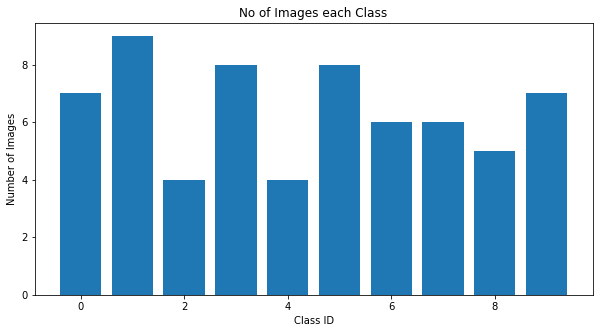

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses),numOfSamples)
plt.title("No of Images each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

In [153]:
def preProcessing(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #img = cv2.equalizeHist(img)
  #img = img/255
  return img


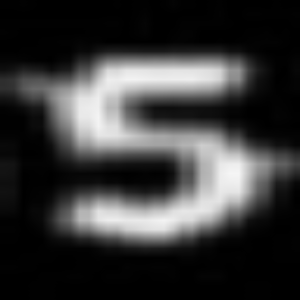

-1

In [154]:
from google.colab.patches import cv2_imshow

img=preProcessing(X_train[30]) #adam 30 koydu
img = cv2.resize(img,(300,300))
cv2_imshow(img)
cv2.waitKey(0)

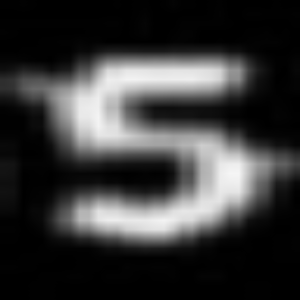

-1

In [155]:
X_train = np.array(list(map(preProcessing,X_train)))

img=X_train[30] #adam 30 koydu
img = cv2.resize(img,(300,300))
cv2_imshow(img)
cv2.waitKey(0)

In [156]:
print(X_train[30].shape)

(32, 32)


In [157]:
X_test = np.array(list(map(preProcessing,X_test)))
X_validation = np.array(list(map(preProcessing,X_validation)))
#before reshape
print(X_train.shape)
#creating depth
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
#after reshape
print(X_train.shape)

(64, 32, 32)
(64, 32, 32, 1)


In [158]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from typing import Sequence

In [159]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam 
#from keras.optimizers import Adam

imageDimensions=(32,32,3)

dataGen= ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)

dataGen.fit(X_train)

#one hot encoding for nn
y_train= to_categorical(y_train,noOfClasses)
y_test= to_categorical(y_test,noOfClasses)
y_validation= to_categorical(y_validation,noOfClasses)

def myModel():
  noOfFilters= 60
  sizeOfFilter1=(5,5)
  sizeOfFilter2= (3,3)
  sizeOfPool= (2,2)
  noOfNode=500

  model = Sequential()
  model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape=(imageDimensions[0],
                                                           imageDimensions[1],
                                                           1), activation= 'relu'
                                                                )))
  model.add((Conv2D(noOfFilters,sizeOfFilter1, activation= 'relu')))

  model.add(MaxPooling2D(pool_size=sizeOfPool))
  model.add((Conv2D(noOfFilters//2,sizeOfFilter2, activation= 'relu')))
  model.add((Conv2D(noOfFilters//2,sizeOfFilter2, activation= 'relu')))
  model.add(MaxPooling2D(pool_size=sizeOfPool))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(noOfNode, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(noOfClasses, activation='softmax'))

  """
  model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Loss
              metrics=['accuracy'])
  """
  
  model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',
                metrics=['accuracy'])
  


  
  return model

model=myModel()
model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 30)         0         
 g2D)                                                 

In [160]:
from sklearn.utils import shuffle

batchSizeVal= 2 #50
epochsVal=5 #10
stepsPerEpochVal= 10 #2000

history = model.fit_generator(dataGen.flow(X_train, y_train,
                                 batch_size=batchSizeVal),
                                 steps_per_epoch=stepsPerEpochVal,
                                 epochs=epochsVal,
                                 validation_data=(X_validation, y_validation),
                                 shuffle=1
                                 )

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


10/10 [==============================] - 1s 55ms/step - loss: 19.0503 - accuracy: 0.1000 - val_loss: 4.9002 - val_accuracy: 0.0625
Epoch 2/5
10/10 [==============================] - 0s 33ms/step - loss: 3.7219 - accuracy: 0.1000 - val_loss: 2.9522 - val_accuracy: 0.1250
Epoch 3/5
10/10 [==============================] - 0s 34ms/step - loss: 2.4153 - accuracy: 0.3000 - val_loss: 2.3338 - val_accuracy: 0.0625
Epoch 4/5
10/10 [==============================] - 0s 33ms/step - loss: 2.3821 - accuracy: 0.0500 - val_loss: 2.2980 - val_accuracy: 0.0625
Epoch 5/5
10/10 [==============================] - 0s 33ms/step - loss: 2.2846 - accuracy: 0.1000 - val_loss: 2.2977 - val_accuracy: 0.0625


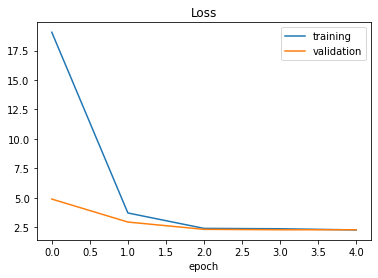

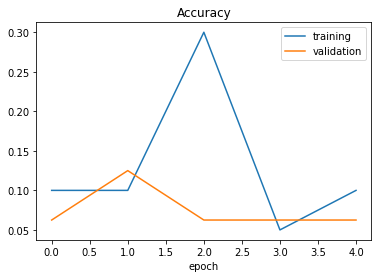

Test Score =  2.299614667892456
Test Accuracy =  0.05000000074505806
INFO:tensorflow:Assets written to: ram://a1f2d2c3-fda2-40c0-9adc-36ec9a1a5cc3/assets


In [161]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

score= model.evaluate(X_test, y_test, verbose=0)
print('Test Score = ', score[0])
print('Test Accuracy = ',score[1])


## model saving
import pickle

pickle_out= open("model_trained.p", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()